In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
Year21 = pd.read_csv('data_2021.csv')

In [3]:
Year21.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,year,start_hour,end_hour,day,day of week,date_is_weekend,trip_duration,time_of_day,trip_duration_min,Month
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,...,2021,0,0,1,Friday,0,1520.0,Night,25.0,January
1,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,...,2021,0,0,1,Friday,0,853.0,Night,14.0,January
2,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,...,2021,0,0,1,Friday,0,335.0,Night,6.0,January
3,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,...,2021,0,0,1,Friday,0,194.0,Night,3.0,January
4,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,...,2021,0,0,1,Friday,0,1042.0,Night,17.0,January


In [4]:
Year21.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
month                 0
year                  0
start_hour            0
end_hour              0
day                   0
day of week           0
date_is_weekend       0
trip_duration         0
time_of_day           0
trip_duration_min     0
Month                 0
dtype: int64

In [5]:
# Create a new column for the route 
Year21['route'] = Year21['start_station_name'] + ' to ' + Year21['end_station_name']

In [6]:
Year21.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,start_hour,end_hour,day,day of week,date_is_weekend,trip_duration,time_of_day,trip_duration_min,Month,route
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,...,0,0,1,Friday,0,1520.0,Night,25.0,January,Maine Ave & 9th St SW to Rosslyn Metro / Wilso...
1,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,...,0,0,1,Friday,0,853.0,Night,14.0,January,17th & Corcoran St NW to 14th & Belmont St NW
2,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,...,0,0,1,Friday,0,335.0,Night,6.0,January,Wilson Blvd. & N. Vermont St. to Wilson Blvd. ...


In [7]:
# Count the occurrences of each route
route_counts = Year21['route'].value_counts()

In [8]:
# Find the most common routes
top_routes = route_counts.head(10)
print("Top 10 Most Common Routes:")
print(top_routes) 

Top 10 Most Common Routes:
route
Jefferson Dr & 14th St SW to Jefferson Dr & 14th St SW                                                            4508
Smithsonian-National Mall / Jefferson Dr & 12th St SW to Smithsonian-National Mall / Jefferson Dr & 12th St SW    4363
4th St & Madison Dr NW to 4th St & Madison Dr NW                                                                  3891
Ohio Dr & West Basin Dr SW / MLK & FDR Memorials to Ohio Dr & West Basin Dr SW / MLK & FDR Memorials              3512
15th St & Constitution Ave NW to 15th St & Constitution Ave NW                                                    3139
Lincoln Memorial to Lincoln Memorial                                                                              2916
Gravelly Point to Gravelly Point                                                                                  2890
Hains Point/Buckeye & Ohio Dr SW to Hains Point/Buckeye & Ohio Dr SW                                              2625
17th St & Indep

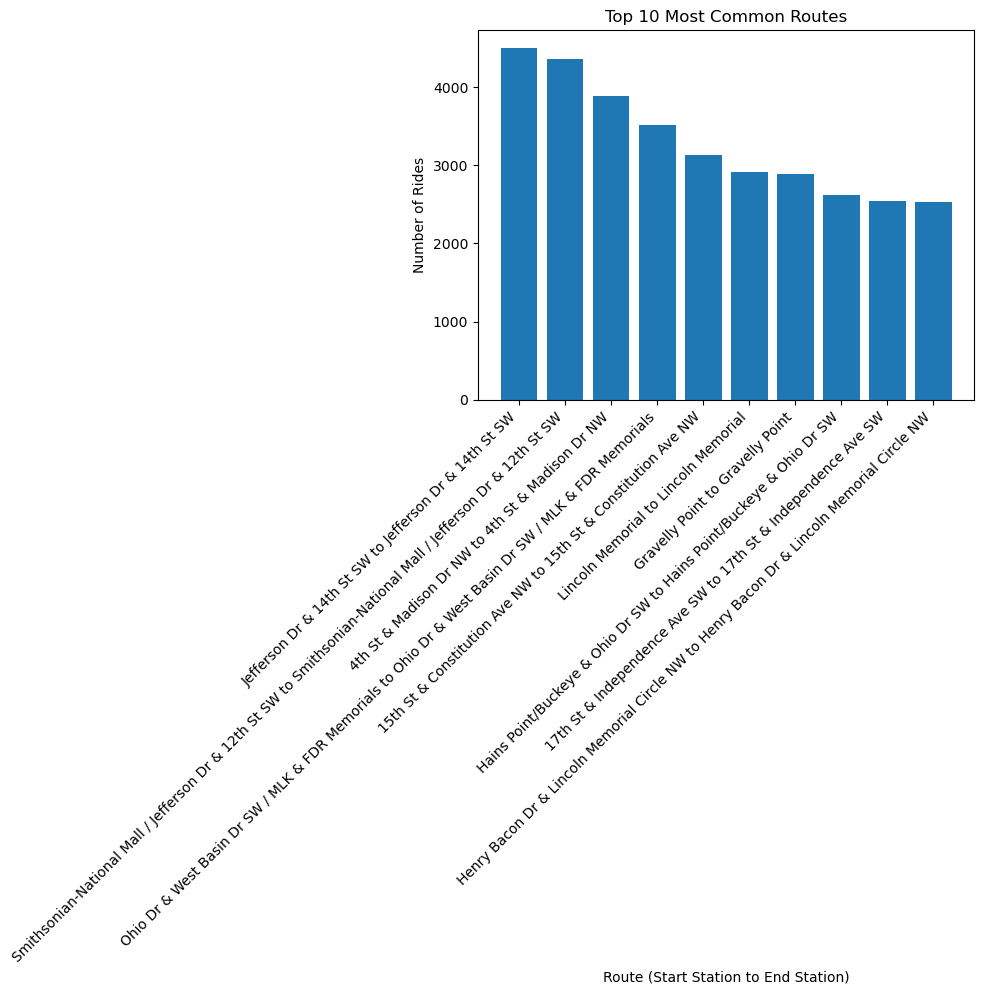

In [35]:
# Optional: Visualize the top routes 
plt.bar(top_routes.index, top_routes.values)
plt.xlabel("Route (Start Station to End Station)")
plt.ylabel("Number of Rides")
plt.title("Top 10 Most Common Routes")
plt.xticks(rotation=45, ha='right')
plt.show()


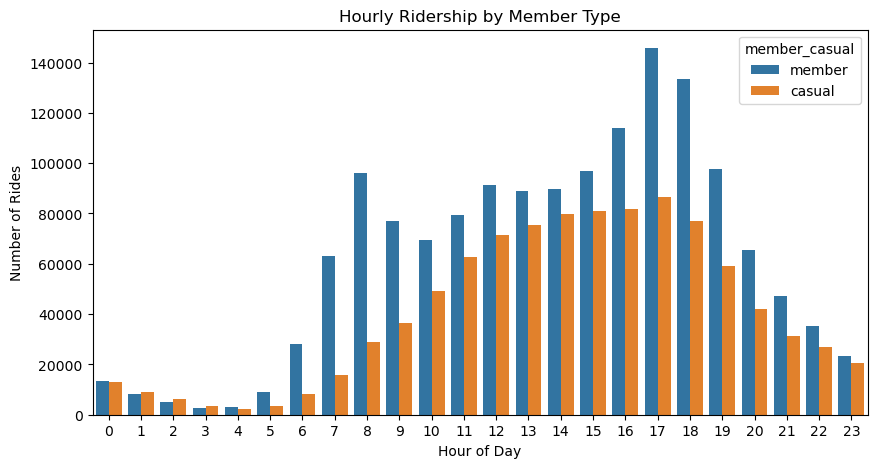

In [10]:
# Hourly ridership comparison
plt.figure(figsize=(10, 5))
sns.countplot(x='start_hour', hue='member_casual', data=Year21)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.title('Hourly Ridership by Member Type')
plt.show()

In [25]:
ride_counts = Year21['member_casual'].value_counts()
print(ride_counts)

member_casual
member    1483532
casual     970971
Name: count, dtype: int64


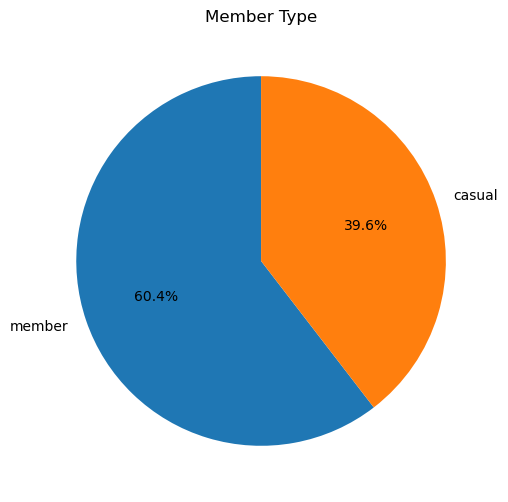

member_casual
member    1483532
casual     970971
Name: count, dtype: int64


In [34]:
# 1. Ride Frequency
ride_counts = Year21['member_casual'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(ride_counts, labels=ride_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Member Type")
plt.show()
print(ride_counts)

In [32]:

# # Extract month from date data

# ## 1. Convert object data (started_at) to datetime dataset
# Year21['started_at'] = pd.to_datetime(Year21['started_at'])
# ## 2. Extract month from (started_at) column
# Year21['month'] = Year21['started_at'].dt.month


# # Comparison of members and casual riders
# x_values = ['Jan', "Feb", 'Mar, Apr, May, Jun, July, Aug, Sep, Oct, Nov, Dec']
# #Generate value and sort it by index
# y_values1 = Year21[Year21['member_casual'] == 'member']['month'].value_counts().sort_index()
# y_values2 = Year21[Year21['member_casual'] == 'casual']['month'].value_counts().sort_index()

# # Create the line chart for the first set of values (y_values1)
# plt.plot(x_values, y_values1, label='Member', marker='o', linestyle='-', color='y')


# # Create the line chart for the second set of values (y_values2)
# plt.plot(x_values, y_values2, label='Casual', marker='x', linestyle='--', color='b')

# # title to the chart
# plt.title('Comparison of member and casual riders', fontweight="bold" )

# # labels for the x and y axes
# plt.xlabel('Month in 2022')
# plt.ylabel('Number of rides')

# # legend to distinguish between the two lines
# plt.legend()

# # Display the chart
# plt.grid(True)  # Add grid lines to the plot
# plt.show()

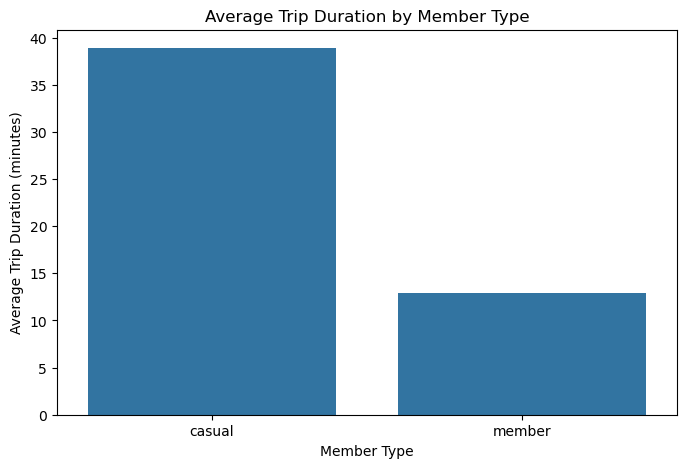

In [12]:
# 2. Trip Duration
avg_duration = Year21.groupby('member_casual')['trip_duration_min'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_duration.index, y=avg_duration.values)
plt.xlabel("Member Type")
plt.ylabel("Average Trip Duration (minutes)")
plt.title("Average Trip Duration by Member Type")
plt.show()


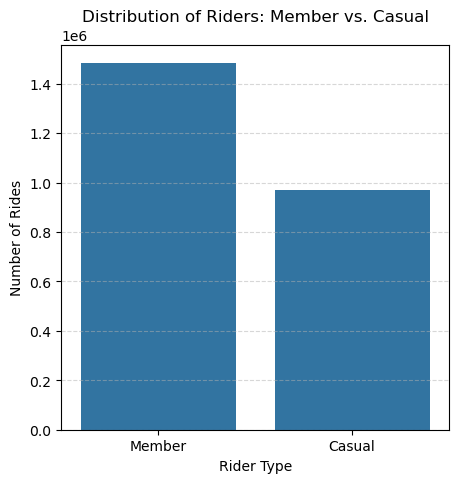

In [13]:
plt.figure(figsize=(5, 5)) 

# Create the countplot
sns.countplot(x='member_casual', data=Year21)

# Set title and labels
plt.title('Distribution of Riders: Member vs. Casual')
plt.xlabel('Rider Type')
plt.ylabel('Number of Rides')

# Customize appearance (optional)
plt.xticks(ticks=[0, 1], labels=['Member','Casual']) 
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

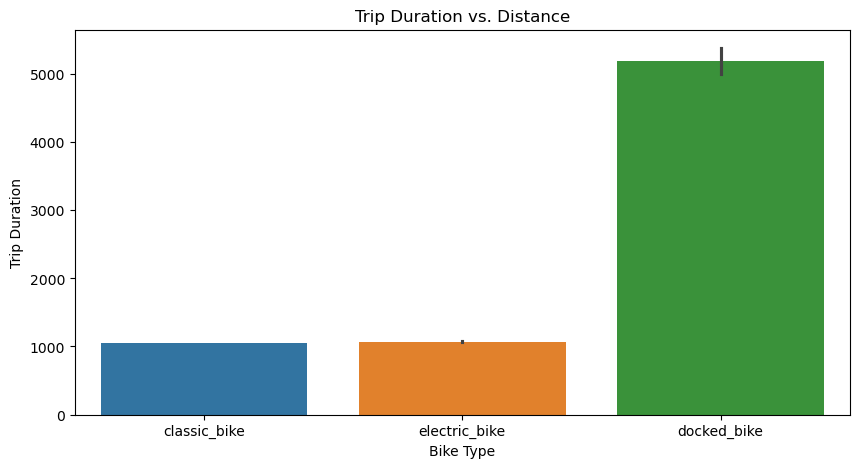

In [14]:
# Trip duration vs. distance
# Assuming you have calculated distance in a separate step
plt.figure(figsize=(10, 5))
sns.barplot(x='rideable_type', y='trip_duration', hue='rideable_type', data=Year21)
plt.xlabel('Bike Type')
plt.ylabel('Trip Duration')
plt.title('Trip Duration vs. Distance')
plt.show()

In [15]:
# 3. Preferred Routes (Simplified - Count of rides for each start station)
top_start_stations_member = Year21[Year21['member_casual'] == 'Member']['start_station_name'].value_counts().head(5)
top_start_stations_casual = Year21[Year21['member_casual'] == 'Casual']['start_station_name'].value_counts().head(5)


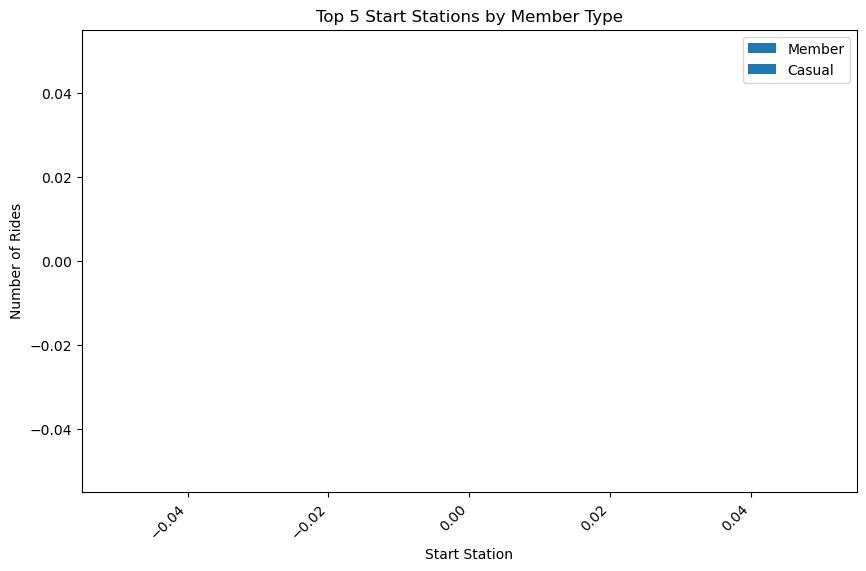

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(top_start_stations_member.index, top_start_stations_member.values, label='Member')
plt.bar(top_start_stations_casual.index, top_start_stations_casual.values, bottom=top_start_stations_member.values, label='Casual')
plt.xlabel("Start Station")
plt.ylabel("Number of Rides")
plt.title("Top 5 Start Stations by Member Type")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

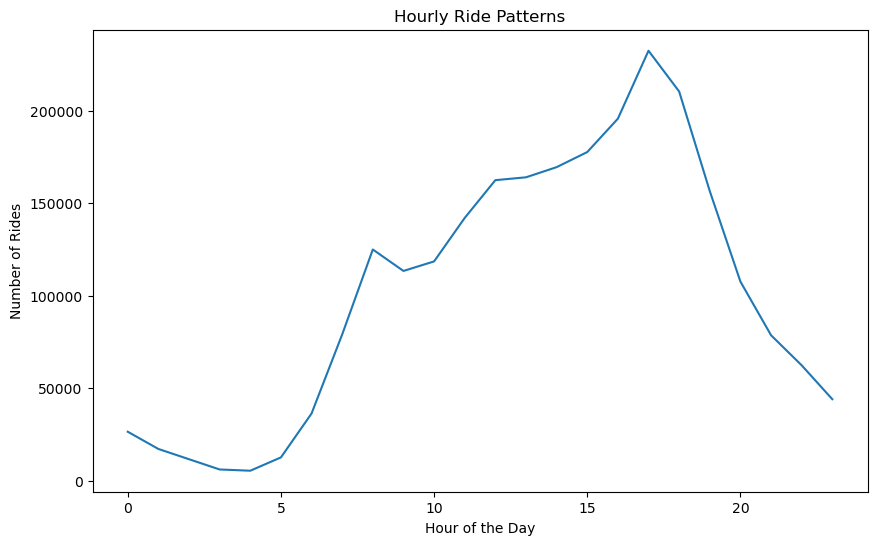

In [17]:
# 1. Hourly Ride Patterns
hourly_rides = Year21.groupby('start_hour')['ride_id'].count()

plt.figure(figsize=(10, 6))
plt.plot(hourly_rides.index, hourly_rides.values)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Rides")
plt.title("Hourly Ride Patterns")
plt.show()


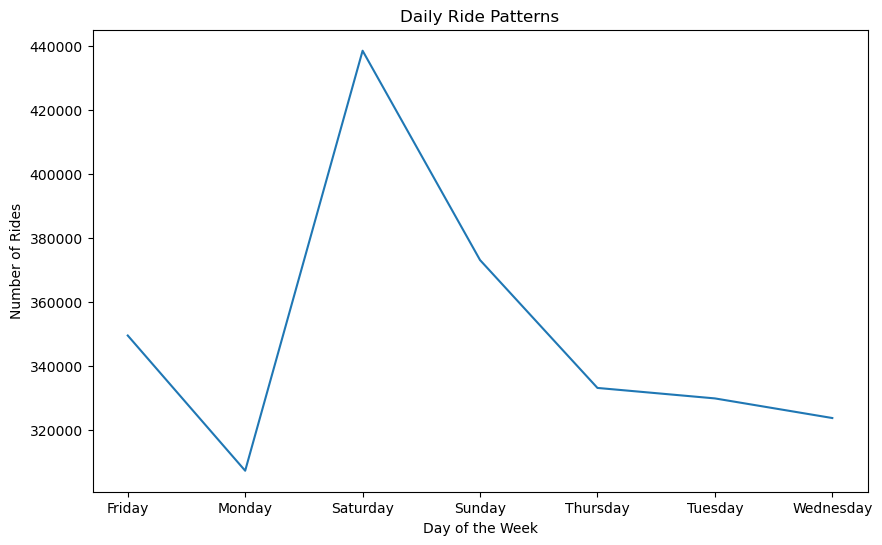

In [18]:
# 2. Daily Ride Patterns
daily_rides = Year21.groupby('day of week')['ride_id'].count() 
# Assuming 'weekdays' column represents days of the week (e.g., 'Monday', 'Tuesday', ...)

plt.figure(figsize=(10, 6))
plt.plot(daily_rides.index, daily_rides.values)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Rides")
plt.title("Daily Ride Patterns")
plt.show()


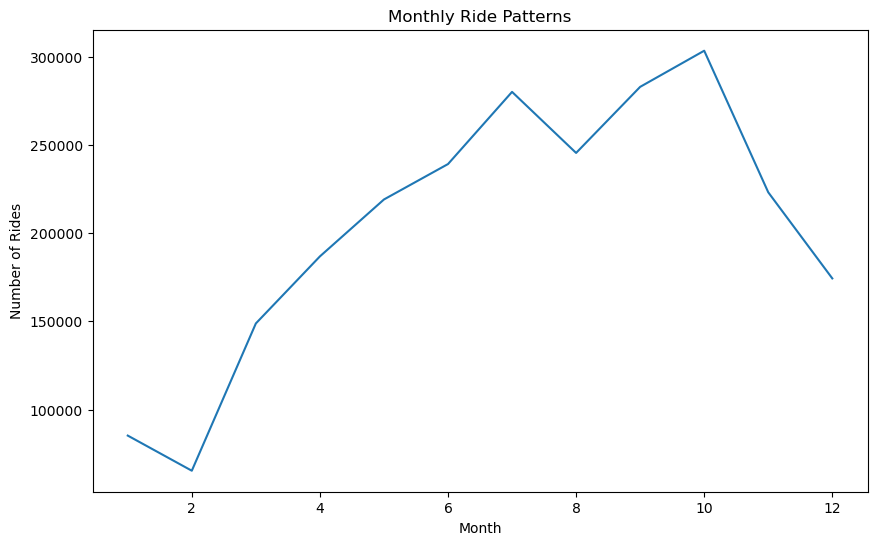

In [19]:
# 3. Monthly Ride Patterns
monthly_rides = Year21.groupby('month')['ride_id'].count()

plt.figure(figsize=(10, 6))
plt.plot(monthly_rides.index, monthly_rides.values)
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.title("Monthly Ride Patterns")
plt.show()


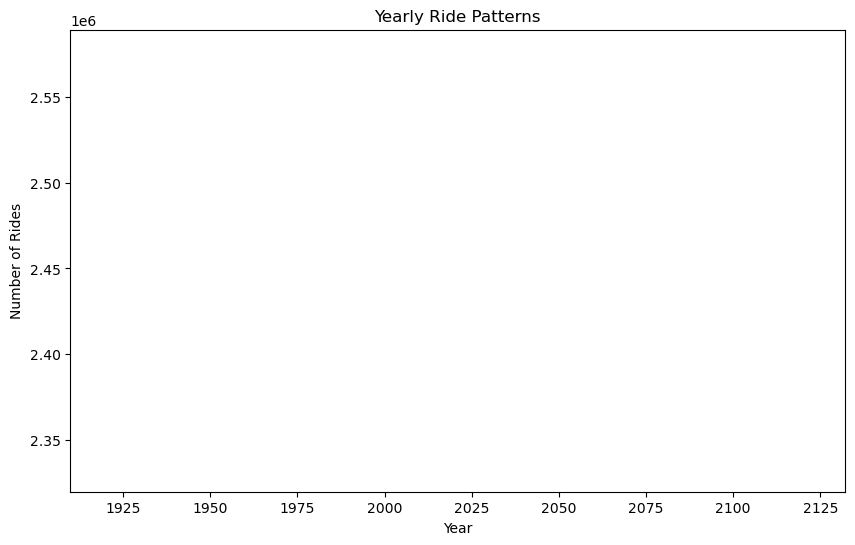

In [20]:
# 4. Yearly Ride Patterns (if available)
if 'year' in Year21.columns:
    yearly_rides = Year21.groupby('year')['ride_id'].count()

    plt.figure(figsize=(10, 6))
    plt.plot(yearly_rides.index, yearly_rides.values)
    plt.xlabel("Year")
    plt.ylabel("Number of Rides")
    plt.title("Yearly Ride Patterns")
    plt.show()


In [21]:
Year21.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'month', 'year', 'start_hour', 'end_hour', 'day',
       'day of week', 'date_is_weekend', 'trip_duration', 'time_of_day',
       'trip_duration_min', 'Month', 'route'],
      dtype='object')

In [22]:
# Trip duration vs. distance
# Assuming you have calculated distance in a separate step
plt.figure(figsize=(10, 5))
sns.scatterplot(x='distance', y='trip_duration', hue='member_casual', data=Year21)
plt.xlabel('Distance')
plt.ylabel('Trip Duration (seconds)')
plt.title('Trip Duration vs. Distance')
plt.show()


ValueError: Could not interpret value `distance` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x500 with 0 Axes>

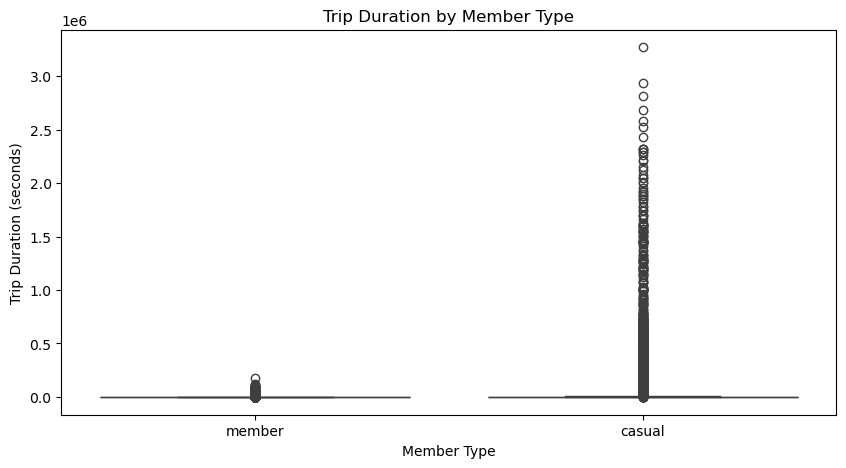

In [24]:

# Trip duration comparison
plt.figure(figsize=(10, 5))
sns.boxplot(x='member_casual', y='trip_duration', data=Year21)
plt.xlabel('Member Type')
plt.ylabel('Trip Duration (seconds)')
plt.title('Trip Duration by Member Type')
plt.show()


In [ ]:
# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(ride_freq['member_casual'], ride_freq['ride_count'])
plt.xlabel('Member Type')
plt.ylabel('Number of Rides')
plt.title('Ride Frequency by Member Type')
plt.show()


In [12]:
print(type(Year21.index))  # Check the type of your DataFrame's index

<class 'pandas.core.indexes.range.RangeIndex'>


In [13]:
# Calculate ride starts per station per hour
# station_hourly_starts = Year21.groupby(['start_station_id', pd.Grouper(key='started_at', freq='H')])['ride_id'].count().reset_index(name='start_count')


In [15]:
# Calculate ride ends per station per hour
# station_hourly_ends = Year21.groupby(['end_station_id', pd.Grouper(key='ended_at', freq='H')])['ride_id'].count().reset_index(name='end_count')